In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from transformers import pipeline

# Stuff important to custom Naive Bayes specifically
import pickle
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

## Last pre-processing

Rename the columns as well as change positive tweets from target = 4 to target = 1

In [2]:
df = pd.read_csv("../model-files/tweets-cleaned.csv", encoding='ISO-8859-1')
df = df.iloc[:, [0, 2]] # Don't want the data from before processing
df

/var/folders/wh/j0mpnsjn5dn3d140byhbb9h80000gn/T/ipykernel_3450/2755469249.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../model-files/tweets-cleaned.csv", encoding='ISO-8859-1')


,target,clean
0,0,URL aww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,behaving mad see
...,...,...
1700025,4,chris great hear due time amp reminder indeed ...
1700026,4,thanks shout great aboard
1700027,4,hey long URL talk
1700028,4,matt would say URL adulthood URL


In [3]:
df['target'].replace(4, 1, inplace=True) # Replace all the 4s with 1s
df.rename(columns={'target': 'sentiment', 'text':'tweet'}, inplace=True) # Rename the columns
df

,sentiment,clean
0,0,URL aww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,behaving mad see
...,...,...
1700025,4,chris great hear due time amp reminder indeed ...
1700026,4,thanks shout great aboard
1700027,4,hey long URL talk
1700028,4,matt would say URL adulthood URL


In [4]:
df.dtypes

sentiment    object
clean        object
dtype: object

In [5]:
text, sentiment = list(df['clean']), list(df['sentiment']) # Turn these both into lists

text = [str(item) for item in text]
positive_text = text[850000:] # Dataset arranged in a way such that the first half is negative and second half is positive
negative_text = text[:850000]
negative_text[0].split()

['URL', 'aww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

## Word cloud for positive and negative text

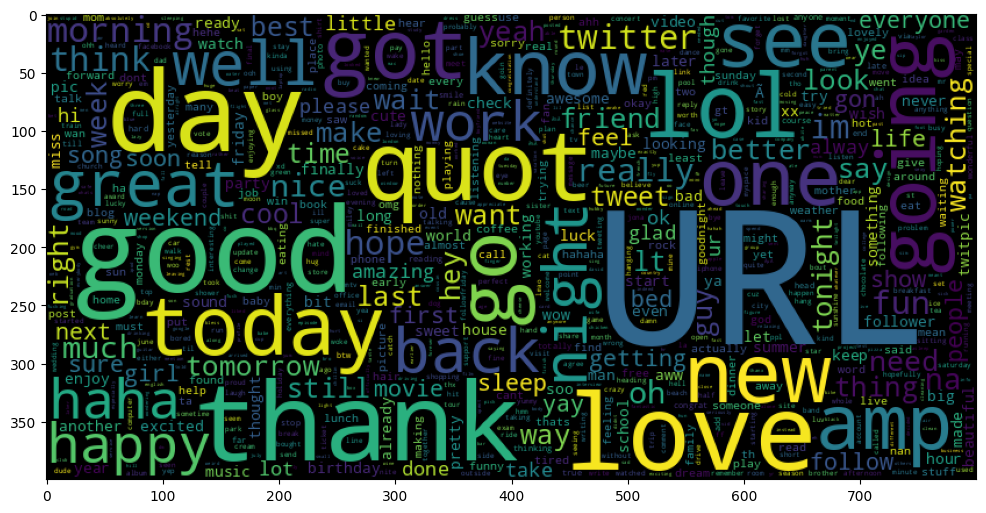

In [6]:
# Positive text
plt.figure(figsize = (12,12))
wc = WordCloud(max_words = 1000 , width = 800 , height = 400,
               collocations=False).generate(" ".join(positive_text))
plt.imshow(wc)

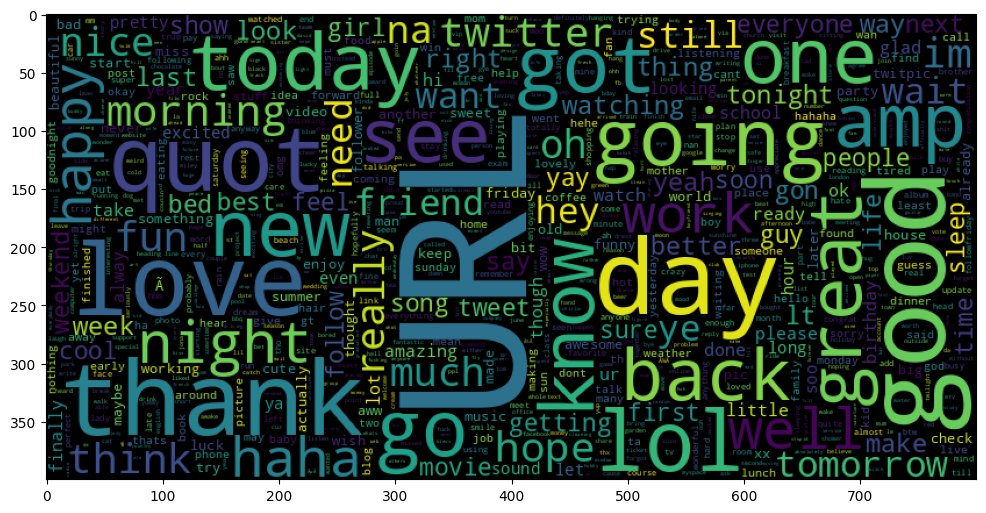

In [ ]:
# Positive text
plt.figure(figsize = (12,12))
wc = WordCloud(max_words = 1000 , width = 800 , height = 400,
               collocations=False).generate(" ".join(positive_text))
plt.imshow(wc)

In [7]:
with open("../model-files/stop-words.txt") as f:
    stopwords = [line.strip() for line in f]
stopwords = set(stopwords)
stopwords # Check the stop words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Naive Bayes

Implement Naive Bayes from scratch BUT also consider bigrams

In [8]:
from NaiveBayes import NaiveBayesClassifier

In [9]:
import random
random.shuffle(positive_text)
random.shuffle(negative_text)
train_pos = positive_text[:850000]
train_neg = negative_text[:850000]

test_pos = positive_text[700000:] # The above should be :700000 to test the model but for the deployed model I will use all training examples
test_neg = negative_text[700000:]

In [10]:
Naive_Bayes = NaiveBayesClassifier()
Naive_Bayes.fit(train_pos, train_neg)
print("Training complete.")

Training complete.


In [11]:
message = "i like you"
Naive_Bayes.predict(message)

('negative', 0.5096795673114123)

In [12]:
message = "this is a message"
Naive_Bayes.predict(message)

('positive', 0.511323388831595)

In [14]:
message = "I dislike you"
Naive_Bayes.predict(message)

('negative', 0.7699831423660558)

In [15]:
message = "I dont dislike you"
Naive_Bayes.predict(message)

('positive', 0.11484774198303016)

In [34]:
message = "die"
Naive_Bayes.predict(message)

('negative', 0.6383585398553577)

In [24]:
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
message = "I hate you"
sentiment_pipeline([message])[0]['label']

'negative'

## Test for validation
Test the dataset to see how accurate it is

In [22]:
correct_count = 0
total = 0
for i in range(len(test_pos)):
    emotion, value = Naive_Bayes.predict(test_pos[i])
    if abs(value - 0.5) < 0.04:
        continue # Neutral
    if emotion == "positive":
        correct_count += 1
    total += 1
for i in range(len(test_neg)):
    emotion, value = Naive_Bayes.predict(test_neg[i])
    if abs(value - 0.5) < 0.04:
        continue # Neutral
    if emotion == "negative":
        correct_count += 1
    total += 1
print("Overall accuracy on validation set:", correct_count/(total))

Overall accuracy on validation set: 0.7870394996944974


In [18]:
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")
prediction = sentiment_pipeline(["I like you"])[0]['label']
print(prediction)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


positive


In [20]:
# Test ROBERTA accuracy
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")
total = 0
for i in range(len(test_pos)):
    prediction = sentiment_pipeline([test_pos[i]])[0]['label']
    if emotion == "neutral":
        continue
    if emotion == "positive":
        correct_count += 1
    total += 1
for i in range(len(test_pos)):
    prediction = sentiment_pipeline([test_pos[i]])[0]['label']
    if emotion == "neutral":
        continue
    if emotion == "negative":
        correct_count += 1
    total += 1
print("Overall accuracy on validation set:", correct_count/(total))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KeyboardInterrupt: 

## Pickle the model for use in the bot


In [ ]:
# Pickle the Naive Bayes classifier object
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(Naive_Bayes, f)

print("Naive Bayes model saved as naive_bayes_model.pkl")

Naive Bayes model saved as naive_bayes_model.pkl


## Try with Multinomial Naive Bayes and Logistic Regression

These are to compare the performance under optimal conditions. I will still be using my implementation of Naive Bayes from scratch for deployment because of how lightweight it is.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text, sentiment, test_size=0.2, random_state=42) # Get a train test split based off of Naive Bayes

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
model_Evaluate(MultiNB)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           1       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



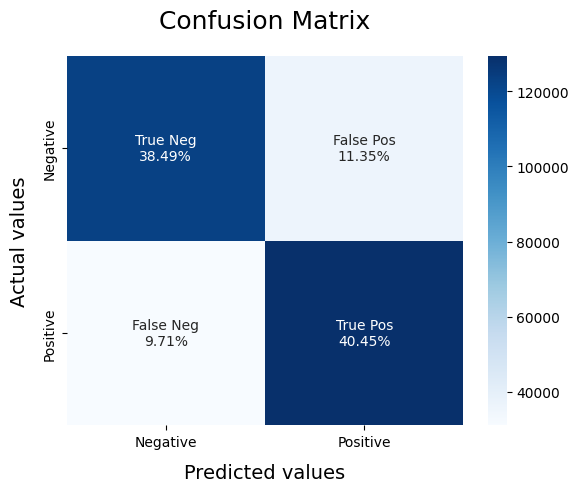

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)